In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import cv2
import matplotlib.pyplot as plt
%matplotlib

Using TensorFlow backend.


Using matplotlib backend: TkAgg


In [2]:
batch_size = 128
num_classes = 10
epochs = 20

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


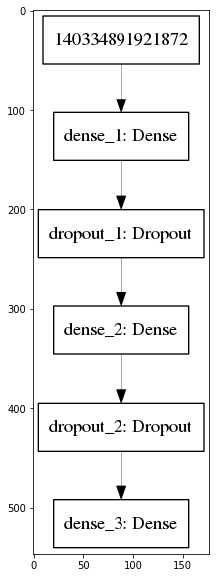

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

keras.utils.plot_model(model, to_file='models/mnist_mlp.png')
img = cv2.imread('models/mnist_mlp.png',3)
fig = plt.figure(figsize=(10, 10))
m1 = plt.imshow(img)
plt.show()

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2472 - acc: 0.9234 - val_loss: 0.1016 - val_acc: 0.9670
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.1030 - acc: 0.9687 - val_loss: 0.0976 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0758 - acc: 0.9773 - val_loss: 0.0756 - val_acc: 0.9774
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0597 - acc: 0.9827 - val_loss: 0.0874 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0503 - acc: 0.9849 - val_loss: 0.0712 - val_acc: 0.9806
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0426 - acc: 0.9876 - val_loss: 0.0735 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0368 - acc: 0.9895 - val_loss: 0.0833 - val_acc